# Project 01 - Write a Data Science Blog Post

## Data

Boston_calendar.csv
Boston_listings.csv

## Business Questions

### Q1. How To Be a Super Host? 

### Q2. How the Price/Night Change Over the Year in Seattle?

### Q3. Can we Predict Property Price/Night in Seattle Using Machine Learning Model?

Data Cleaning 

In [1]:
# Import All needed libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


%matplotlib inline

In [2]:
# Import data for Seattle
df = pd.read_csv('Seattle_listings.csv')
df

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,8101950,https://www.airbnb.com/rooms/8101950,20160104002432,2016-01-04,3BR Mountain View House in Seattle,Our 3BR/2BA house boasts incredible views of t...,"Our 3BR/2BA house bright, stylish, and wheelch...",Our 3BR/2BA house boasts incredible views of t...,none,We're located near lots of family fun. Woodlan...,...,8.0,f,NaN,WASHINGTON,f,strict,f,f,8,0.30
3814,8902327,https://www.airbnb.com/rooms/8902327,20160104002432,2016-01-04,Portage Bay View!-One Bedroom Apt,800 square foot 1 bedroom basement apartment w...,This space has a great view of Portage Bay wit...,800 square foot 1 bedroom basement apartment w...,none,The neighborhood is a quiet oasis that is clos...,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,1,2.00
3815,10267360,https://www.airbnb.com/rooms/10267360,20160104002432,2016-01-04,Private apartment view of Lake WA,"Very comfortable lower unit. Quiet, charming m...",NaN,"Very comfortable lower unit. Quiet, charming m...",none,NaN,...,NaN,f,NaN,WASHINGTON,f,moderate,f,f,1,NaN
3816,9604740,https://www.airbnb.com/rooms/9604740,20160104002432,2016-01-04,Amazing View with Modern Comfort!,Cozy studio condo in the heart on Madison Park...,Fully furnished unit to accommodate most needs...,Cozy studio condo in the heart on Madison Park...,none,Madison Park offers a peaceful slow pace upsca...,...,NaN,f,NaN,WASHINGTON,f,moderate,f,f,1,NaN


## Seattle Dataset Overview

In [3]:
# Repetitive value test
df.duplicated(['id']).sum()

0

In [4]:
# Show Seattle dataset columns details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [5]:
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [6]:
# Based on data review, the columns in the list will be dropped:
to_drop_cols = ['host_verifications','host_has_profile_pic','street','neighbourhood','neighbourhood_group_cleansed', 'city', 'zipcode','state','market','smart_location',
                'country_code','country','xl_picture_url','host_id','host_url','id','last_scraped','listing_url','scrape_id','name','summary','space','neighborhood_overview',
                'notes','thumbnail_url','description','experiences_offered','neighbourhood','latitude','longitude','host_location','host_acceptance_rate',
                'amenities', 'square_feet','weekly_price','monthly_price','security_deposit','host_acceptance_rate','host_total_listings_count','calendar_last_scraped',
                'calendar_updated','host_response_rate',
  'medium_url','picture_url','host_name','host_about','host_thumbnail_url','host_neighbourhood','cleaning_fee','reviews_per_month','host_picture_url','host_listings_count','is_location_exact',
  'has_availability','availability_30','availability_60','availability_90','first_review','last_review','license','jurisdiction_names','calculated_host_listings_count']

In [7]:
# Delete some features
df.drop(columns=to_drop_cols,axis=1,inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   transit                           2884 non-null   object 
 1   host_since                        3816 non-null   object 
 2   host_response_time                3295 non-null   object 
 3   host_is_superhost                 3816 non-null   object 
 4   host_identity_verified            3816 non-null   object 
 5   neighbourhood_cleansed            3818 non-null   object 
 6   property_type                     3817 non-null   object 
 7   room_type                         3818 non-null   object 
 8   accommodates                      3818 non-null   int64  
 9   bathrooms                         3802 non-null   float64
 10  bedrooms                          3812 non-null   float64
 11  beds                              3817 non-null   float64
 12  bed_ty

In [9]:
# Data Conversion
df.host_since = pd.to_datetime(df.host_since)
df.host_since=(2021 - (df.host_since.dt.year + df.host_since.dt.month/12 +  (df.host_since.dt.day/365)))
df.host_since

0       9.303196
1       7.775799
2       6.467123
3       7.066895
4       9.003881
          ...   
3813    5.631050
3814    5.128311
3815    4.917808
3816    5.908447
3817    6.598174
Name: host_since, Length: 3818, dtype: float64

In [10]:
# Check which features have missing values
df.isnull().sum().sort_values(ascending=False)

transit                             934
review_scores_checkin               658
review_scores_accuracy              658
review_scores_value                 656
review_scores_location              655
review_scores_cleanliness           653
review_scores_communication         651
review_scores_rating                647
host_response_time                  523
bathrooms                            16
bedrooms                              6
host_since                            2
host_is_superhost                     2
host_identity_verified                2
property_type                         1
beds                                  1
requires_license                      0
instant_bookable                      0
cancellation_policy                   0
require_guest_profile_picture         0
minimum_nights                        0
number_of_reviews                     0
availability_365                      0
maximum_nights                        0
extra_people                          0


In [11]:
# After Taking look on our data we will fill nulls and prepare features as follows:

In [12]:
# Missing values are padded as fixed values
df.host_response_time.fillna('nodata', inplace=True)
df.host_response_time.value_counts()

within an hour        1692
within a few hours     968
within a day           597
nodata                 523
a few days or more      38
Name: host_response_time, dtype: int64

In [13]:
# Missing values are padded as fixed values
df.host_is_superhost.fillna('t', inplace=True)
df.host_is_superhost.value_counts()

f    3038
t     780
Name: host_is_superhost, dtype: int64

In [14]:
# Missing values are padded as fixed values and converted to binary classification
df.transit.fillna('nodata',inplace=True)
mask = df.transit != 'nodata'
df.loc[mask,'transit'] = 'data' 
df.transit.value_counts()

data      2884
nodata     934
Name: transit, dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   transit                           3818 non-null   object 
 1   host_since                        3816 non-null   float64
 2   host_response_time                3818 non-null   object 
 3   host_is_superhost                 3818 non-null   object 
 4   host_identity_verified            3816 non-null   object 
 5   neighbourhood_cleansed            3818 non-null   object 
 6   property_type                     3817 non-null   object 
 7   room_type                         3818 non-null   object 
 8   accommodates                      3818 non-null   int64  
 9   bathrooms                         3802 non-null   float64
 10  bedrooms                          3812 non-null   float64
 11  beds                              3817 non-null   float64
 12  bed_ty

In [16]:
# Missing Values: Deletes the row where the missing value is located 
#Due to the small number of missing values, deleting the row will not affect the results
df_host=['host_since', 'host_identity_verified', 'property_type', 'host_is_superhost']
df.dropna(subset = df_host, inplace=True)

In [17]:
df.info()
# View info after filling nulls in string cloumns 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3815 entries, 0 to 3817
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   transit                           3815 non-null   object 
 1   host_since                        3815 non-null   float64
 2   host_response_time                3815 non-null   object 
 3   host_is_superhost                 3815 non-null   object 
 4   host_identity_verified            3815 non-null   object 
 5   neighbourhood_cleansed            3815 non-null   object 
 6   property_type                     3815 non-null   object 
 7   room_type                         3815 non-null   object 
 8   accommodates                      3815 non-null   int64  
 9   bathrooms                         3799 non-null   float64
 10  bedrooms                          3809 non-null   float64
 11  beds                              3814 non-null   float64
 12  bed_ty

In [18]:
# Missing values are replaced by means
df_room = ['beds', 'bedrooms', 'bathrooms']
df[df_room] = SimpleImputer().fit_transform(df[df_room])

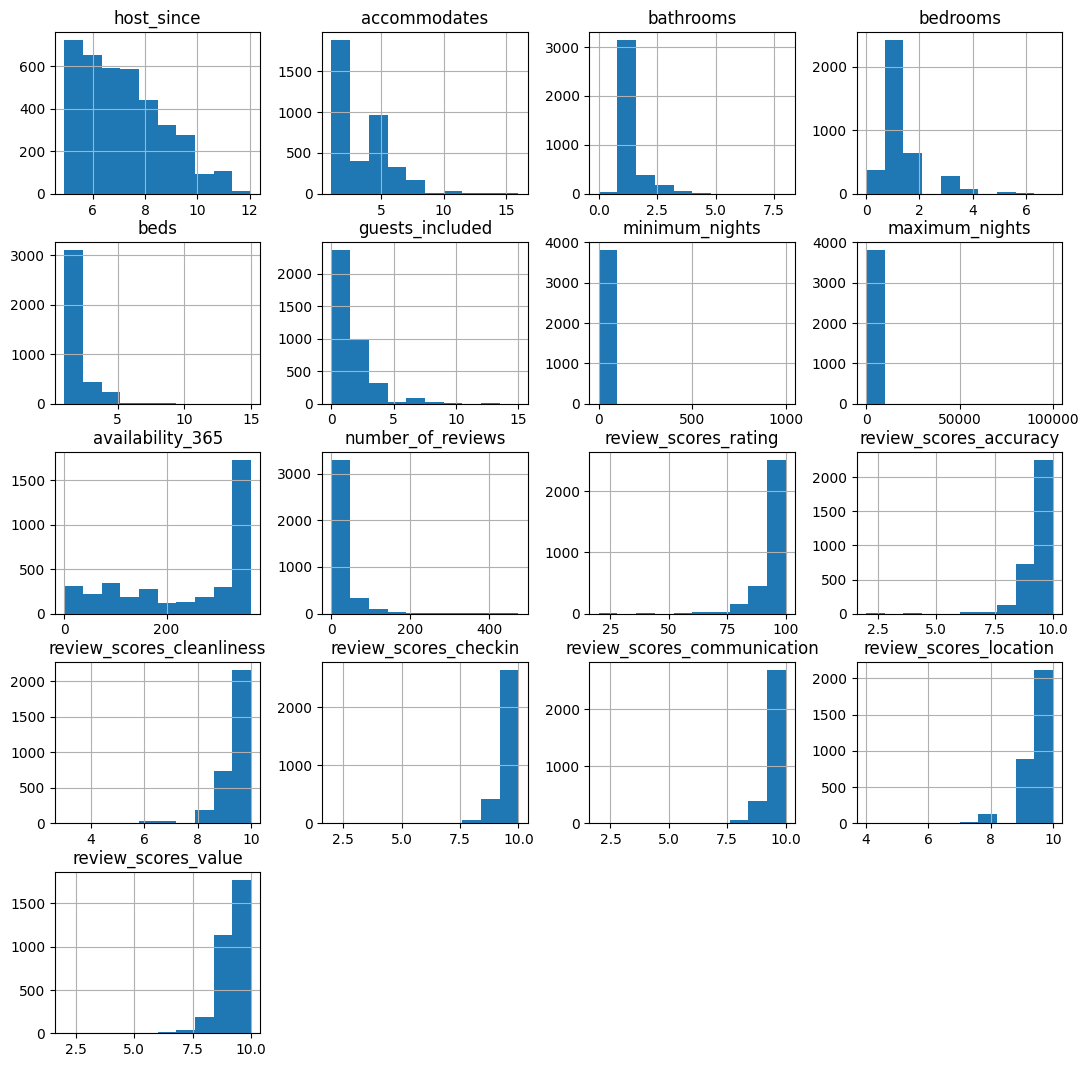

In [19]:
df.hist(figsize=(13,13));

In [20]:
# Missing values are replaced by the mode
df_review = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']
for i in df_review:
    df[i]=df[i].fillna(df[i].mode()[0])

In [21]:
# Check for missing values
df.isnull().sum().sort_values(ascending=False)
# No

transit                             0
host_since                          0
require_guest_profile_picture       0
cancellation_policy                 0
instant_bookable                    0
requires_license                    0
review_scores_value                 0
review_scores_location              0
review_scores_communication         0
review_scores_checkin               0
review_scores_cleanliness           0
review_scores_accuracy              0
review_scores_rating                0
number_of_reviews                   0
availability_365                    0
maximum_nights                      0
minimum_nights                      0
extra_people                        0
guests_included                     0
price                               0
bed_type                            0
beds                                0
bedrooms                            0
bathrooms                           0
accommodates                        0
room_type                           0
property_typ

## Q1. How To Be a Super Host? 

To answer the first question, you need to first set the host_ Is_ Superhost becomes 0/1 for easy drawing and observationDetermine how to become a superhost based on the following characteristics



In [22]:
# First we need to replace `t` and `f` values in the `host_is_superhost` to be 1 or 0 so we can proceed in analysis easiar
df.host_is_superhost.replace({'t': 1, 'f': 0},inplace=True)

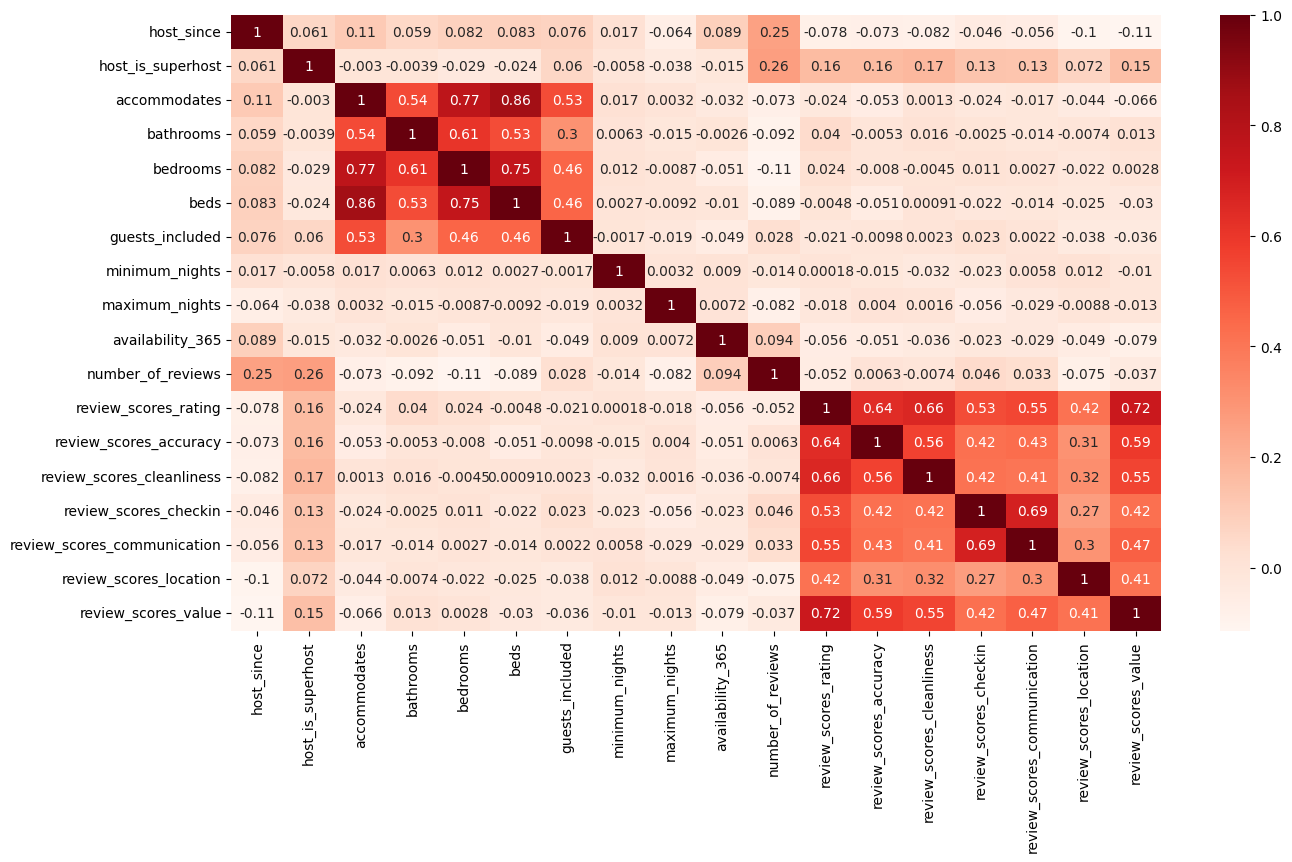

In [23]:
# Correlation analysis of DF datasets was obtained
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True,cmap='Reds');

<Axes: xlabel='host_is_superhost', ylabel='number_of_reviews'>

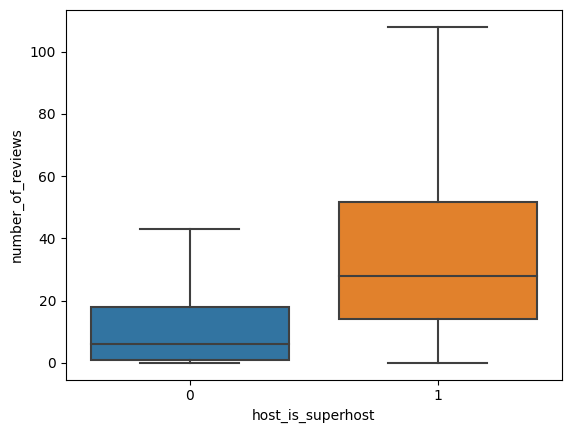

In [24]:
# Draw a box diagram of the host_is-superhost and number_of_reviews
sns.boxplot(x='host_is_superhost', y= 'number_of_reviews', data=df, showfliers = False)

In [25]:
def barh(features,color='Blue'):
    group = df.groupby(features).mean()
    plt.barh(y=group.index, width=group.host_is_superhost,color=color)

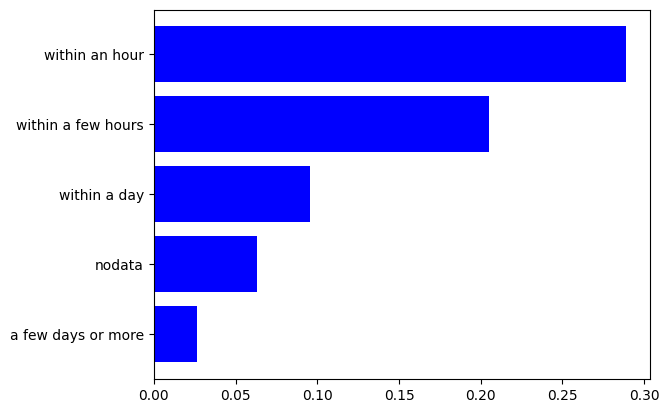

In [26]:
#Draw a bar chart to determine the relationship between super hsot and response time
barh('host_response_time')

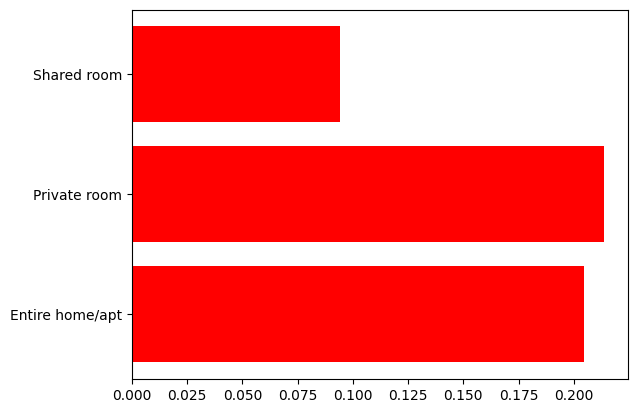

In [27]:
#Draw a bar chart to determine the relationship between super host and house types
barh('room_type',color='Red')

### Answer: How To Be a Superhost
According to the descriptive analysis above, the shorter the corresponding time, the greater the probability of becoming a super landlord.
From the descriptive analysis above, it can be seen that time types have little to do with super host, but very bad times still have a certain impact

## Q2. How the Price/Night Change Over the Year in Seattle?

To solve the second problem, the main approach is to group the data by month and draw a bar chart to see how prices change

In [28]:
# Read the data
df2 = pd.read_csv('Seattle_calendar.csv')
df2

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
...,...,...,...,...
1393565,10208623,2016-12-29,f,NaN
1393566,10208623,2016-12-30,f,NaN
1393567,10208623,2016-12-31,f,NaN
1393568,10208623,2017-01-01,f,NaN


In [29]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [30]:
# Delete rows with missing values
df2.dropna(inplace=True)
df2

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
9,241032,2016-01-13,t,$85.00
10,241032,2016-01-14,t,$85.00
14,241032,2016-01-18,t,$85.00
...,...,...,...,...
1393207,10208623,2016-01-06,t,$87.00
1393208,10208623,2016-01-07,t,$87.00
1393211,10208623,2016-01-10,t,$87.00
1393212,10208623,2016-01-11,t,$87.00


In [31]:
# Data Conversion
df2.date = pd.to_datetime(df2.date)

In [32]:
# $ to float
df2.price = df2.price.str.replace('["$",","]','',regex=True).astype('float')

In [33]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 934542 entries, 0 to 1393213
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   listing_id  934542 non-null  int64         
 1   date        934542 non-null  datetime64[ns]
 2   available   934542 non-null  object        
 3   price       934542 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 35.6+ MB


array([[<Axes: title={'center': 'listing_id'}>,
        <Axes: title={'center': 'date'}>],
       [<Axes: title={'center': 'price'}>, <Axes: >]], dtype=object)

<Figure size 1300x1300 with 0 Axes>

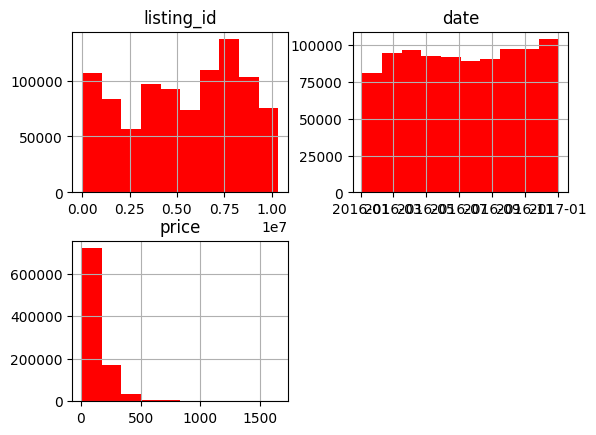

In [34]:
# Using histograms to determine how data is distributed
plt.figure(figsize=(13,13))
df2.hist(color='Red')

In [35]:
df2.groupby(by=df2['date'].dt.strftime('%b')).price.count()

date
Apr    76037
Aug    76347
Dec    87061
Feb    73321
Jan    64937
Jul    74222
Jun    77244
Mar    83938
May    79971
Nov    81780
Oct    82438
Sep    77246
Name: price, dtype: int64

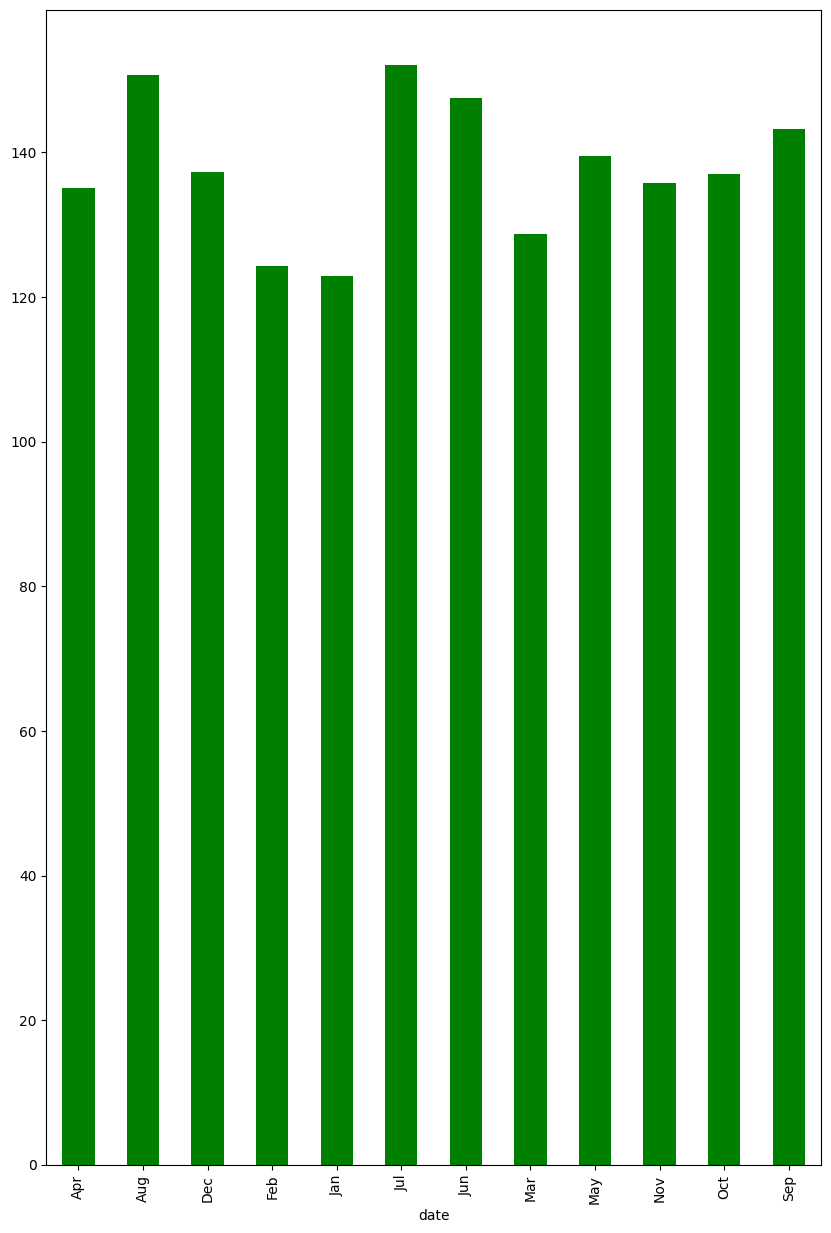

In [36]:
# By using a bar chart, it is easy to see how prices change throughout the year
Seattle_group = df2.groupby(by=df2['date'].dt.strftime('%b')).price.mean()
plt.figure(figsize=(10,15));
Seattle_group.plot.bar(x=Seattle_group.index, y= Seattle_group.values,color='Green');

### Answer: How the Price/Night Change Over the Year in Seattle?

Rental prices are highest during the summer months, but after the summer months, prices continue to drop until the end of winter
There is also a certain relationship between whether you become a super landlord and the type of rent, and the worse the house, the less likely it is to become a super landlord 

## Q3. Can we Predict Property Price/Night in Seattle Using Machine Learning Model?

In [37]:
from sklearn.preprocessing import RobustScaler, OneHotEncoder,MinMaxScaler
from sklearn.svm import SVR
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit, learning_curve
from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
# After 6 hours of continous work and many trials with the imported ML algorithms and preprocessing techniques.....

In [38]:
df3=df

In [39]:
df3.price = df3.price.str.replace('["$",","]','',regex=True).astype('float')

In [40]:
df3

,transit,host_since,host_response_time,host_is_superhost,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,nodata,9.303196,within a few hours,0,t,West Queen Anne,Apartment,Entire home/apt,4,1.0,...,10.0,10.0,10.0,9.0,10.0,f,f,moderate,f,f
1,data,7.775799,within an hour,1,t,West Queen Anne,Apartment,Entire home/apt,4,1.0,...,10.0,10.0,10.0,10.0,10.0,f,f,strict,t,t
2,data,6.467123,within a few hours,0,t,West Queen Anne,House,Entire home/apt,11,4.5,...,10.0,10.0,10.0,10.0,10.0,f,f,strict,f,f
3,nodata,7.066895,nodata,0,t,West Queen Anne,Apartment,Entire home/apt,3,1.0,...,10.0,10.0,10.0,10.0,10.0,f,f,flexible,f,f
4,data,9.003881,within an hour,0,t,West Queen Anne,House,Entire home/apt,6,2.0,...,9.0,10.0,10.0,9.0,9.0,f,f,strict,f,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,nodata,5.631050,within a few hours,0,t,Fremont,House,Entire home/apt,6,2.0,...,10.0,4.0,8.0,10.0,8.0,f,f,strict,f,f
3814,data,5.128311,within an hour,0,t,Portage Bay,Apartment,Entire home/apt,4,1.0,...,10.0,10.0,10.0,10.0,10.0,f,f,moderate,f,f
3815,nodata,4.917808,nodata,0,f,Rainier Beach,House,Entire home/apt,2,1.0,...,10.0,10.0,10.0,10.0,10.0,f,f,moderate,f,f
3816,data,5.908447,within an hour,0,t,Madison Park,Condominium,Entire home/apt,2,1.0,...,10.0,10.0,10.0,10.0,10.0,f,f,moderate,f,f


In [41]:
x = df3.drop('price',axis=1)
y = df3['price']

In [42]:
x=pd.get_dummies(x)

The use of model building and grid search

In [43]:
model=RandomForestRegressor()
param_grid = {
    'max_features': [3,5],
     'max_depth': [3,5]
}


model_add= GridSearchCV(model, param_grid,cv = 3)

# After wide search, I kept the best parameters. If you would like to try others, it may take long time
# I used GPU to fit the model as it takes less time

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [45]:
df3

,transit,host_since,host_response_time,host_is_superhost,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,nodata,9.303196,within a few hours,0,t,West Queen Anne,Apartment,Entire home/apt,4,1.0,...,10.0,10.0,10.0,9.0,10.0,f,f,moderate,f,f
1,data,7.775799,within an hour,1,t,West Queen Anne,Apartment,Entire home/apt,4,1.0,...,10.0,10.0,10.0,10.0,10.0,f,f,strict,t,t
2,data,6.467123,within a few hours,0,t,West Queen Anne,House,Entire home/apt,11,4.5,...,10.0,10.0,10.0,10.0,10.0,f,f,strict,f,f
3,nodata,7.066895,nodata,0,t,West Queen Anne,Apartment,Entire home/apt,3,1.0,...,10.0,10.0,10.0,10.0,10.0,f,f,flexible,f,f
4,data,9.003881,within an hour,0,t,West Queen Anne,House,Entire home/apt,6,2.0,...,9.0,10.0,10.0,9.0,9.0,f,f,strict,f,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,nodata,5.631050,within a few hours,0,t,Fremont,House,Entire home/apt,6,2.0,...,10.0,4.0,8.0,10.0,8.0,f,f,strict,f,f
3814,data,5.128311,within an hour,0,t,Portage Bay,Apartment,Entire home/apt,4,1.0,...,10.0,10.0,10.0,10.0,10.0,f,f,moderate,f,f
3815,nodata,4.917808,nodata,0,f,Rainier Beach,House,Entire home/apt,2,1.0,...,10.0,10.0,10.0,10.0,10.0,f,f,moderate,f,f
3816,data,5.908447,within an hour,0,t,Madison Park,Condominium,Entire home/apt,2,1.0,...,10.0,10.0,10.0,10.0,10.0,f,f,moderate,f,f


In [46]:
# model train
model_fit = model_add.fit(x_train, y_train)

In [47]:
print("model score: %.2f" % model_fit.score(x_test, y_test))
# As our dataset is small, I could achieve r^2 value as 0.55 . Clearly, our model tends to overfit but its ok with our dataset

model score: 0.30


In [48]:
y_pred=model_add.predict(x_test)

Model evaluation: Comparing predicted values with actual values to determine the effectiveness of the model

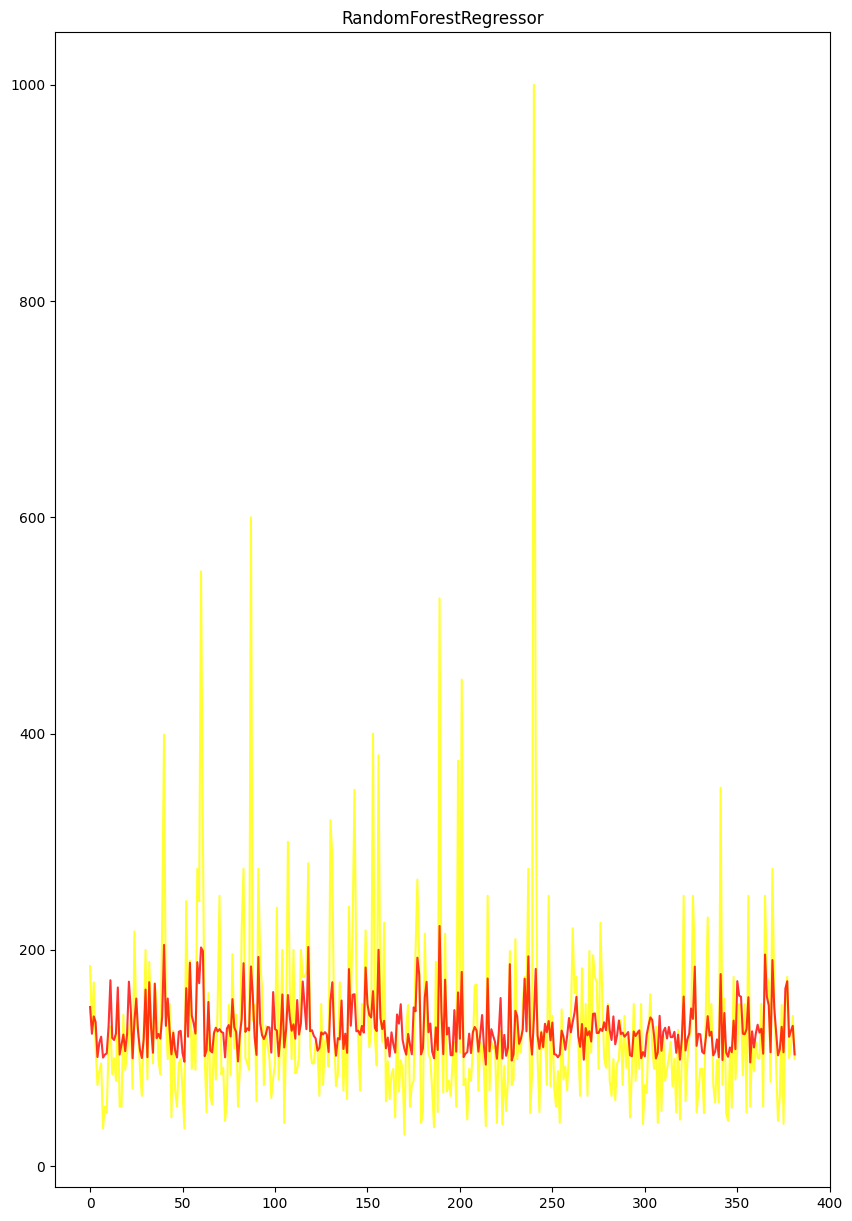

In [49]:
plt.figure(figsize=(10,15))
plt.plot([i for i in range(y_test.shape[0])], y_test, color='yellow', alpha=0.8, label="y_test")
plt.plot([i for i in range(y_test.shape[0])], y_pred, color='red', alpha=0.8, label="y_pred")
plt.title("RandomForestRegressor")
plt.show()


### Answer: Q3. Can we predict Property Price/Night in Seattle & Boston Using Machine Learning Model
- I used a random forest and grid search in the machine learning model, cross-validation to solve this problem, the score is 0.30, due to the time constraints, you can try other models, you can add other datasets, maybe the effect will be better